In [1]:
# Importing libraries:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the datasets:
train = pd.read_csv('./../Train.csv')
test = pd.read_csv('./../Test.csv')
ss = pd.read_csv('./../SampleSubmission.csv')

In [5]:
train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [6]:
test.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501


In [7]:
train.shape, test.shape

((21454, 19), (7194, 18))

In [8]:
y = train['Target']

In [9]:
y

0        0.132783
1        0.004898
2        0.097320
3        0.304107
4        0.605328
           ...   
21449    0.624088
21450    0.250042
21451    0.314871
21452    0.237831
21453    0.165071
Name: Target, Length: 21454, dtype: float64

In [10]:
train.drop('Target', axis=1, inplace= True)

In [11]:
# Adding unique identifiers to train and test sets
train['source'] = 'train'
test['source'] = 'test'

In [12]:
# Concatenation both train and test sets together so i can perform EDA on them
df = pd.concat((train, test), ignore_index=True)

In [13]:
df.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,source
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,train
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,train
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,train
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,train
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,train


In [14]:
# Checking for missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28648 entries, 0 to 28647
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       28648 non-null  object 
 1   country                                  28648 non-null  object 
 2   year                                     28648 non-null  int64  
 3   urban_or_rural                           28648 non-null  object 
 4   ghsl_water_surface                       28648 non-null  float64
 5   ghsl_built_pre_1975                      28648 non-null  float64
 6   ghsl_built_1975_to_1990                  28648 non-null  float64
 7   ghsl_built_1990_to_2000                  28648 non-null  float64
 8   ghsl_built_2000_to_2014                  28648 non-null  float64
 9   ghsl_not_built_up                        28648 non-null  float64
 10  ghsl_pop_density                         28648

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
source                                     0
dtype: int64

#### Conclusion is no missing values

In [15]:
# Performing EDA:

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,28648.0,2010.271537,4.553145,1994.000000,2008.000000,2011.000000,2014.000000,2016.000000
ghsl_water_surface,28648.0,0.027018,0.095199,0.000000,0.000000,0.000000,0.000000,0.991100
ghsl_built_pre_1975,28648.0,0.041010,0.118721,0.000000,0.000000,0.000160,0.008011,0.894608
ghsl_built_1975_to_1990,28648.0,0.027820,0.072850,0.000000,0.000000,0.000602,0.010037,0.685010
ghsl_built_1990_to_2000,28648.0,0.013713,0.034208,0.000000,0.000037,0.000936,0.008823,0.515534
ghsl_built_2000_to_2014,28648.0,0.018369,0.040241,0.000000,0.000109,0.001727,0.015209,0.649159
ghsl_not_built_up,28648.0,0.872069,0.242707,0.000859,0.895615,0.992725,0.999592,1.000000
ghsl_pop_density,28648.0,95.101508,210.079701,0.000000,2.943082,16.424158,64.364772,1902.876955
landcover_crops_fraction,28648.0,21.097237,16.309999,0.000000,6.105505,19.297194,33.199903,80.064918
landcover_urban_fraction,28648.0,14.079153,23.917510,0.000000,0.705307,2.599028,13.063126,98.784092


<AxesSubplot:xlabel='urban_or_rural', ylabel='count'>

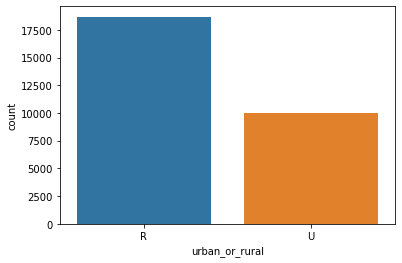

In [17]:
sns.countplot(x='urban_or_rural', data = df)

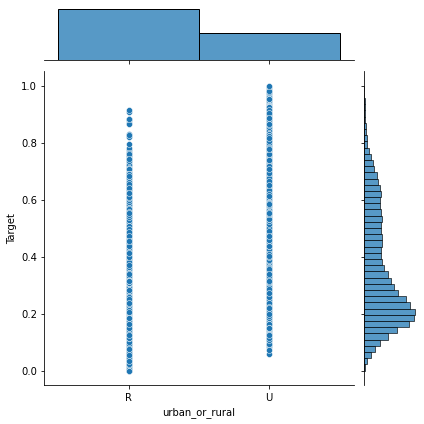

In [18]:
sns.jointplot(x=df['urban_or_rural'], y = y)

In [19]:
df.columns

Index(['ID', 'country', 'year', 'urban_or_rural', 'ghsl_water_surface',
       'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990',
       'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014',
       'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction',
       'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline', 'source'],
      dtype='object')

In [20]:
df.drop('ID', axis=1, inplace=True)

In [21]:
df['country'].value_counts()

Nigeria                         2695
Kenya                           2626
Tanzania                        2450
Malawi                          1957
Ethiopia                        1721
Uganda                          1584
Ghana                           1419
Mali                            1295
Zimbabwe                        1189
Cameroon                        1041
Zambia                          1038
Burkina Faso                     997
Rwanda                           984
Senegal                          903
Mozambique                       879
Angola                           855
Lesotho                          794
Democratic Republic of Congo     785
Sierra Leone                     785
Benin                            746
Guinea                           593
Cote d'Ivoire                    481
Togo                             330
Swaziland                        270
Central African Republic         231
Name: country, dtype: int64

<AxesSubplot:xlabel='dist_to_capital', ylabel='Target'>

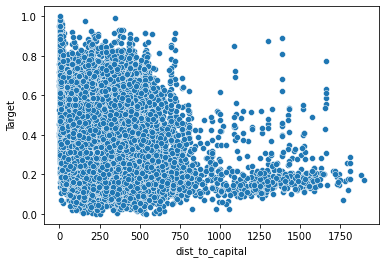

In [22]:
sns.scatterplot(x='dist_to_capital', y=y, data=df, )

<AxesSubplot:>

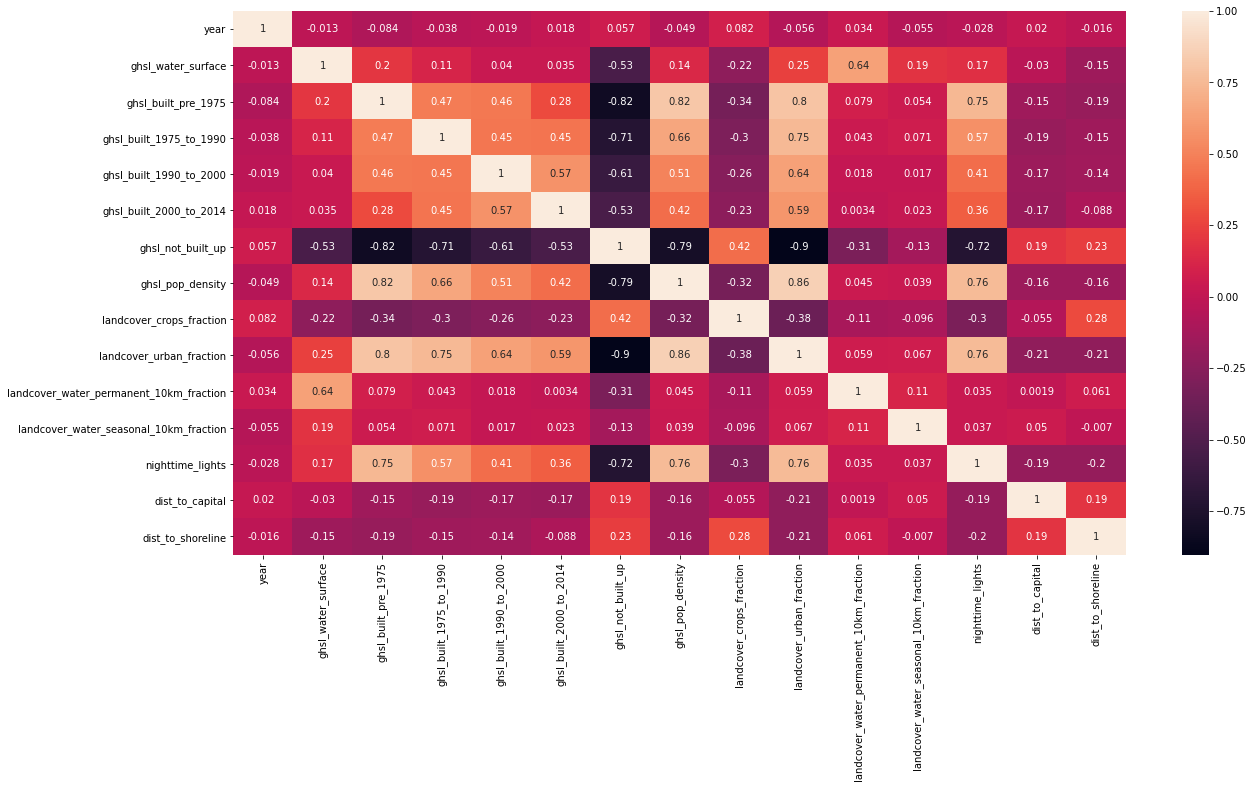

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [24]:
# removing ghsl not built up and ghsl pre 1975 because they are highly correlated with other feautres
df = df.drop(['ghsl_not_built_up', 'ghsl_built_pre_1975'], axis=1)

In [25]:
df.columns

Index(['country', 'year', 'urban_or_rural', 'ghsl_water_surface',
       'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000',
       'ghsl_built_2000_to_2014', 'ghsl_pop_density',
       'landcover_crops_fraction', 'landcover_urban_fraction',
       'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline', 'source'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28648 entries, 0 to 28647
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  28648 non-null  object 
 1   year                                     28648 non-null  int64  
 2   urban_or_rural                           28648 non-null  object 
 3   ghsl_water_surface                       28648 non-null  float64
 4   ghsl_built_1975_to_1990                  28648 non-null  float64
 5   ghsl_built_1990_to_2000                  28648 non-null  float64
 6   ghsl_built_2000_to_2014                  28648 non-null  float64
 7   ghsl_pop_density                         28648 non-null  float64
 8   landcover_crops_fraction                 28648 non-null  float64
 9   landcover_urban_fraction                 28648 non-null  float64
 10  landcover_water_permanent_10km_fraction  28648

In [27]:
df.drop('country', axis=1, inplace=True)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder = LabelEncoder()

In [30]:
cat_cols = ['urban_or_rural']

In [31]:
df[cat_cols] = encoder.fit_transform(df[cat_cols])

In [32]:
# Spliting the dataset back to train and test set
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [33]:
train.shape, test.shape

((21454, 15), (7194, 15))

In [34]:
X = train

In [35]:
X.shape, y.shape

((21454, 15), (21454,))

In [36]:
# SPlitting train dataset into train and test dataset
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15017, 15), (6437, 15), (15017,), (6437,))

In [39]:
#importing model
from xgboost import XGBRegressor

In [40]:
model = XGBRegressor()

In [44]:
X_train.dtypes

year                                         int64
urban_or_rural                               int32
ghsl_water_surface                         float64
ghsl_built_1975_to_1990                    float64
ghsl_built_1990_to_2000                    float64
ghsl_built_2000_to_2014                    float64
ghsl_pop_density                           float64
landcover_crops_fraction                   float64
landcover_urban_fraction                   float64
landcover_water_permanent_10km_fraction    float64
landcover_water_seasonal_10km_fraction     float64
nighttime_lights                           float64
dist_to_capital                            float64
dist_to_shoreline                          float64
source                                      object
dtype: object

In [45]:
for dataframe in (X_train, X_test, test):
    dataframe.drop('source', axis=1, inplace=True)

In [46]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [47]:
train_pred = model.predict(X_train)

In [48]:
from sklearn.metrics import *

In [49]:
explained_variance_score(y_train, train_pred)

0.895622041721959

In [50]:
predictions = model.predict(X_test)

In [51]:
explained_variance_score(y_test, predictions)

0.770257205994408

In [52]:
print("Root mean sqaured error: ",np.sqrt(mean_squared_error(y_test, predictions)))

Root mean sqaured error:  0.09270551951771418


In [54]:
test.columns

Index(['year', 'urban_or_rural', 'ghsl_water_surface',
       'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000',
       'ghsl_built_2000_to_2014', 'ghsl_pop_density',
       'landcover_crops_fraction', 'landcover_urban_fraction',
       'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline'],
      dtype='object')

In [56]:
ss['Target'] = model.predict(test[test.columns])

In [57]:
ss.head()

,ID,Target
0,ID_AAcismbB,0.180693
1,ID_AAeBMsji,0.256954
2,ID_AAjFMjzy,0.718146
3,ID_AAmMOEEC,0.369348
4,ID_ABguzDxp,0.279069


In [58]:
ss.to_csv('FirstSubmission.csv', index=False)